# International research market - Preparation

## Summary
    
* [Introduction](#chapitre1)
        
     * [Import librairies](#section1.1)
     * [Graphic option](#section1.2)
     
* [Data preparation](#chapitre2)

     * [Selecting and cleaning the first file](#section2.1)  
     * [Selecting and cleaning the second file](#section2.2) 
     * [Selecting and cleaning the third file](#section2.3)
     * [Joining files](#section2.4) 
     * [Correlation matrix](#section2.5) 
     * [Data Split](#section2.6)

* [ACP](#chapitre3)

     * [Scaling](#section3.1)
     * [ACP](#section3.2)
     * [Variance and scree diagram](#section3.3)
     * [Components](#section3.4)
     * [Correlation graph](#section3.5)
     * [Projection](#section3.6)

## Exploratory data analysis

### 1. Introduction<a class="anchor" id="chapitre1"></a>

#### 1.1 Import librairies<a class="anchor" id="section1.1"></a>

In [1]:
# Import librairies
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

#### 1.2 Graphic option<a class="anchor" id="section1.2"></a>

In [2]:
sns.set()

### 2. Data preparation<a class="anchor" id="chapitre2"></a>

#### 2.1 Selecting and cleaning the first file<a class="anchor" id="section2.1"></a>

In [3]:
# Import csv file
dispo_alim = pd.read_csv("/Users/antoinebergounhe/Desktop/Openclassroom/Projet 9/DAN-P9-data/DisponibiliteAlimentaire_2017.csv", index_col=3)
dispo_alim.head()

,Code Domaine,Domaine,Code zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
Zone,,,,,,,,,,,,,
Afghanistan,FBS,Nouveaux Bilans Alimentaire,2,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
Afghanistan,FBS,Nouveaux Bilans Alimentaire,2,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
Afghanistan,FBS,Nouveaux Bilans Alimentaire,2,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
Afghanistan,FBS,Nouveaux Bilans Alimentaire,2,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
Afghanistan,FBS,Nouveaux Bilans Alimentaire,2,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [4]:
# General informations
dispo_alim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 176600 entries, Afghanistan to Zimbabwe
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Code Élément            176600 non-null  int64  
 4   Élément                 176600 non-null  object 
 5   Code Produit            176600 non-null  int64  
 6   Produit                 176600 non-null  object 
 7   Code année              176600 non-null  int64  
 8   Année                   176600 non-null  int64  
 9   Unité                   176600 non-null  object 
 10  Valeur                  176600 non-null  float64
 11  Symbole                 176600 non-null  object 
 12  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 18.9+ MB


In [5]:
# Check NaN vallues
dispo_alim.isna().mean()

Code Domaine              0.0
Domaine                   0.0
Code zone                 0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
dtype: float64

In [6]:
# Check the duplicates
dispo_alim.duplicated().sum()

0

In [7]:
# Check the number of unique values
dispo_alim.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7250
Symbole                      2
Description du Symbole       2
dtype: int64

In [8]:
# Remove non-essential columns
dispo_alim = dispo_alim.drop(columns=['Code Domaine', 'Domaine', 'Code zone', 'Code Élément', 'Code Produit', 'Code année', 'Unité', 'Symbole', 'Description du Symbole'])
dispo_alim.head()

,Élément,Produit,Année,Valeur
Zone,,,,
Afghanistan,Production,Blé et produits,2017,4281.0
Afghanistan,Importations - Quantité,Blé et produits,2017,2302.0
Afghanistan,Variation de stock,Blé et produits,2017,-119.0
Afghanistan,Exportations - Quantité,Blé et produits,2017,0.0
Afghanistan,Disponibilité intérieure,Blé et produits,2017,6701.0


In [9]:
# Filter by targeted product
dispo_alim = dispo_alim.loc[dispo_alim['Produit']== 'Viande de Volailles']

In [10]:
# General statistics informations
dispo_alim.describe()

,Année,Valeur
count,2061.0,2061.000000
mean,2017.0,198.614794
std,0.0,1173.205732
min,2017.0,-125.000000
25%,2017.0,1.000000
50%,2017.0,9.440000
75%,2017.0,57.000000
max,2017.0,21914.000000


#### 2.2 Selecting and cleaning the second file<a class="anchor" id="section2.2"></a>

In [11]:
# Import csv file
population = pd.read_csv('/Users/antoinebergounhe/Desktop/Openclassroom/Projet 9/DAN-P9-data/Population_2000_2018.csv', index_col=3)
population.head()

,Code Domaine,Domaine,Code zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
Zone,,,,,,,,,,,,,,
Afghanistan,OA,Séries temporelles annuelles,2,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
Afghanistan,OA,Séries temporelles annuelles,2,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
Afghanistan,OA,Séries temporelles annuelles,2,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
Afghanistan,OA,Séries temporelles annuelles,2,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
Afghanistan,OA,Séries temporelles annuelles,2,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [12]:
# General informations
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4411 entries, Afghanistan to Zimbabwe
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Code Élément            4411 non-null   int64  
 4   Élément                 4411 non-null   object 
 5   Code Produit            4411 non-null   int64  
 6   Produit                 4411 non-null   object 
 7   Code année              4411 non-null   int64  
 8   Année                   4411 non-null   int64  
 9   Unité                   4411 non-null   object 
 10  Valeur                  4411 non-null   float64
 11  Symbole                 4411 non-null   object 
 12  Description du Symbole  4411 non-null   object 
 13  Note                    258 non-null    object 
dtypes: float64(1), int64(5), object

In [13]:
# Check NaN values
population.isna().mean()

Code Domaine              0.00000
Domaine                   0.00000
Code zone                 0.00000
Code Élément              0.00000
Élément                   0.00000
Code Produit              0.00000
Produit                   0.00000
Code année                0.00000
Année                     0.00000
Unité                     0.00000
Valeur                    0.00000
Symbole                   0.00000
Description du Symbole    0.00000
Note                      0.94151
dtype: float64

In [14]:
# Check duplicates
population.duplicated().sum()

0

In [15]:
# Check the number of unique values
population.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  238
Code Élément                 1
Élément                      1
Code Produit                 1
Produit                      1
Code année                  19
Année                       19
Unité                        1
Valeur                    4398
Symbole                      2
Description du Symbole       2
Note                         1
dtype: int64

In [16]:
# Remove non-essential columns
population = population.drop(columns=['Code Domaine', 'Élément', 'Produit', 'Domaine', 'Code zone', 'Code Élément', 'Code Produit', 'Code année', 'Unité', 'Symbole', 'Description du Symbole', 'Note'])

# Change the value to unit value
population['Valeur']= population['Valeur']*1000
population.head()

,Année,Valeur
Zone,,
Afghanistan,2000,20779953.0
Afghanistan,2001,21606988.0
Afghanistan,2002,22600770.0
Afghanistan,2003,23680871.0
Afghanistan,2004,24726684.0


In [17]:
# General statistics informations
population.describe()

,Année,Valeur
count,4411.000000,4.411000e+03
mean,2009.068238,2.963004e+07
std,5.481539,1.238029e+08
min,2000.000000,7.850000e+02
25%,2004.000000,3.921890e+05
50%,2009.000000,4.764741e+06
75%,2014.000000,1.821548e+07
max,2018.000000,1.427648e+09


#### 2.3 Selecting and cleaning the third file<a class="anchor" id="section2.3"></a>

In [18]:
# Import csv file
pib_stabilité = pd.read_csv('/Users/antoinebergounhe/Desktop/Openclassroom/Projet 9/DAN-P9-data/PIB_stabilité.csv', index_col=3)
pib_stabilité.head()

,Code Domaine,Domaine,Code zone (M49),Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
Zone,,,,,,,,,,,,,,
Afghanistan,FS,Données de la sécurité alimentaire,4,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,2058.40,X,Ciffre de sources internationales,NaN
Afghanistan,FS,Données de la sécurité alimentaire,4,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
Afrique du Sud,FS,Données de la sécurité alimentaire,710,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,13860.30,X,Ciffre de sources internationales,NaN
Afrique du Sud,FS,Données de la sécurité alimentaire,710,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN
Albanie,FS,Données de la sécurité alimentaire,8,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2017,2017,I$,12771.00,X,Ciffre de sources internationales,NaN


In [19]:
# Create a list with two selected columns
cols = ['Produit', 'Valeur']

# Create a df taking the two colomns from the list
pib_stabilité = pib_stabilité[cols]

# Change the column name
pib_stabilité = pib_stabilité.rename(columns={'Produit' : 'Élément'})
pib_stabilité

,Élément,Valeur
Zone,,
Afghanistan,"PIB par habitant, ($ PPA internationaux consta...",2058.40
Afghanistan,Stabilité politique et absence de violence/ter...,-2.80
Afrique du Sud,"PIB par habitant, ($ PPA internationaux consta...",13860.30
Afrique du Sud,Stabilité politique et absence de violence/ter...,-0.28
Albanie,"PIB par habitant, ($ PPA internationaux consta...",12771.00
...,...,...
Yémen,Stabilité politique et absence de violence/ter...,-2.94
Zambie,"PIB par habitant, ($ PPA internationaux consta...",3485.00
Zambie,Stabilité politique et absence de violence/ter...,0.15


In [20]:
# Check the df columns
pib_stabilité.columns

Index(['Élément', 'Valeur'], dtype='object')

In [21]:
# Check the duplicates
pib_stabilité.duplicated().sum()

50

In [22]:
# Check null values sum
pib_stabilité.isnull().sum()

Élément    0
Valeur     0
dtype: int64

#### 2.4 Joining files<a class="anchor" id="section2.4"></a>

In [23]:
# Create a list with two dfs
liste_concat = [dispo_alim, pib_stabilité]

# Concatenate the two dfs were in the list
alim_2017 = pd.concat(liste_concat)
alim_2017

,Élément,Produit,Année,Valeur
Zone,,,,
Afghanistan,Production,Viande de Volailles,2017.0,28.00
Afghanistan,Importations - Quantité,Viande de Volailles,2017.0,29.00
Afghanistan,Variation de stock,Viande de Volailles,2017.0,0.00
Afghanistan,Disponibilité intérieure,Viande de Volailles,2017.0,57.00
Afghanistan,Pertes,Viande de Volailles,2017.0,2.00
...,...,...,...,...
Yémen,Stabilité politique et absence de violence/ter...,NaN,NaN,-2.94
Zambie,"PIB par habitant, ($ PPA internationaux consta...",NaN,NaN,3485.00
Zambie,Stabilité politique et absence de violence/ter...,NaN,NaN,0.15


In [24]:
# Filling in missing values using the forward fill method
alim_2017['Produit'] = alim_2017['Produit'].fillna(method='ffill')

# Filling in missing values using the forward fill method
alim_2017['Année'] = alim_2017['Année'].fillna(method='ffill')
alim_2017

,Élément,Produit,Année,Valeur
Zone,,,,
Afghanistan,Production,Viande de Volailles,2017.0,28.00
Afghanistan,Importations - Quantité,Viande de Volailles,2017.0,29.00
Afghanistan,Variation de stock,Viande de Volailles,2017.0,0.00
Afghanistan,Disponibilité intérieure,Viande de Volailles,2017.0,57.00
Afghanistan,Pertes,Viande de Volailles,2017.0,2.00
...,...,...,...,...
Yémen,Stabilité politique et absence de violence/ter...,Viande de Volailles,2017.0,-2.94
Zambie,"PIB par habitant, ($ PPA internationaux consta...",Viande de Volailles,2017.0,3485.00
Zambie,Stabilité politique et absence de violence/ter...,Viande de Volailles,2017.0,0.15


In [25]:
# Joining the alim_2017 and population dfs
alim_pop_2017_volailles = pd.merge(alim_2017, population, on=['Zone', 'Année'], how='inner')

alim_pop_2017_volailles.head()

,Élément,Produit,Année,Valeur_x,Valeur_y
Zone,,,,,
Afghanistan,Production,Viande de Volailles,2017.0,28.0,36296113.0
Afghanistan,Importations - Quantité,Viande de Volailles,2017.0,29.0,36296113.0
Afghanistan,Variation de stock,Viande de Volailles,2017.0,0.0,36296113.0
Afghanistan,Disponibilité intérieure,Viande de Volailles,2017.0,57.0,36296113.0
Afghanistan,Pertes,Viande de Volailles,2017.0,2.0,36296113.0


In [26]:
# Rename columns
alim_pop_2017_volailles = alim_pop_2017_volailles.rename(columns={'Valeur_x':'Valeur', 'Valeur_y':'Population'})

alim_pop_2017_volailles.tail()

,Élément,Produit,Année,Valeur,Population
Zone,,,,,
Soudan du Sud,Stabilité politique et absence de violence/ter...,Viande de Volailles,2017.0,-2.45,10910763.0
Tonga,"PIB par habitant, ($ PPA internationaux consta...",Viande de Volailles,2017.0,6466.30,101998.0
Tonga,Stabilité politique et absence de violence/ter...,Viande de Volailles,2017.0,0.79,101998.0
Tuvalu,"PIB par habitant, ($ PPA internationaux consta...",Viande de Volailles,2017.0,4010.10,11370.0
Tuvalu,Stabilité politique et absence de violence/ter...,Viande de Volailles,2017.0,1.24,11370.0


In [27]:
# Export merged data in CSV format
alim_pop_2017_volailles_csv_data = alim_pop_2017_volailles.to_csv('alim_pop_2017.csv', index = True)

In [28]:
# Converting the 'Value' column into a float data type
alim_pop_2017_volailles['Valeur'] = alim_pop_2017_volailles[['Valeur']].astype(float)

In [29]:
# Using the pivot_table function
alim_2017_volailles = alim_pop_2017_volailles.pivot_table(index=['Zone', 'Population'], columns='Élément', values='Valeur').reset_index()

# Re-organise the columns order
column_order = ['Zone', 'Population', 'Production', 'Importations - Quantité', 'Variation de stock', 'Exportations - Quantité',
                'Disponibilité intérieure', 'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus', 'Nourriture',
                'Disponibilité alimentaire en quantité (kg/personne/an)', 'PIB par habitant, ($ PPA internationaux constants de 2017)', 'Stabilité politique et absence de violence/terrorisme (indice)']

alim_2017_volailles = alim_2017_volailles[column_order]

# 'Zone' become the df's index
alim_2017_volailles.set_index('Zone', inplace=True)

# Replace the NaN vallues by 0
alim_2017_volailles.fillna(0, inplace=True)
alim_2017_volailles.head(40)

Élément,Population,Production,Importations - Quantité,Variation de stock,Exportations - Quantité,Disponibilité intérieure,Aliments pour animaux,Semences,Pertes,Résidus,Nourriture,Disponibilité alimentaire en quantité (kg/personne/an),"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice)
Zone,,,,,,,,,,,,,,
Afghanistan,36296113.0,28.0,29.0,0.0,0.0,57.0,0.0,0.0,2.0,0.0,55.0,1.53,2058.4,-2.80
Afrique du Sud,57009756.0,1667.0,514.0,0.0,63.0,2118.0,0.0,0.0,83.0,0.0,2035.0,35.69,13860.3,-0.28
Albanie,2884169.0,13.0,38.0,4.0,0.0,47.0,0.0,0.0,0.0,0.0,47.0,16.36,12771.0,0.38
Algérie,41389189.0,275.0,2.0,0.0,0.0,277.0,0.0,0.0,13.0,0.0,264.0,6.38,11737.4,-0.92
Allemagne,82658409.0,1514.0,842.0,-29.0,646.0,1739.0,0.0,0.0,0.0,-38.0,1609.0,19.47,53071.5,0.59
Andorre,77001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.42
Angola,29816766.0,42.0,277.0,0.0,0.0,319.0,0.0,0.0,2.0,0.0,315.0,10.56,7310.9,-0.38
Antigua-et-Barbuda,95426.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,5.0,54.10,19840.3,0.75
Arabie saoudite,33101179.0,616.0,722.0,-108.0,10.0,1435.0,0.0,0.0,0.0,0.0,1435.0,43.36,47306.2,-0.64


#### 2.5 Correlation matrix<a class="anchor" id="section2.5"></a>

<AxesSubplot:xlabel='Élément', ylabel='Élément'>

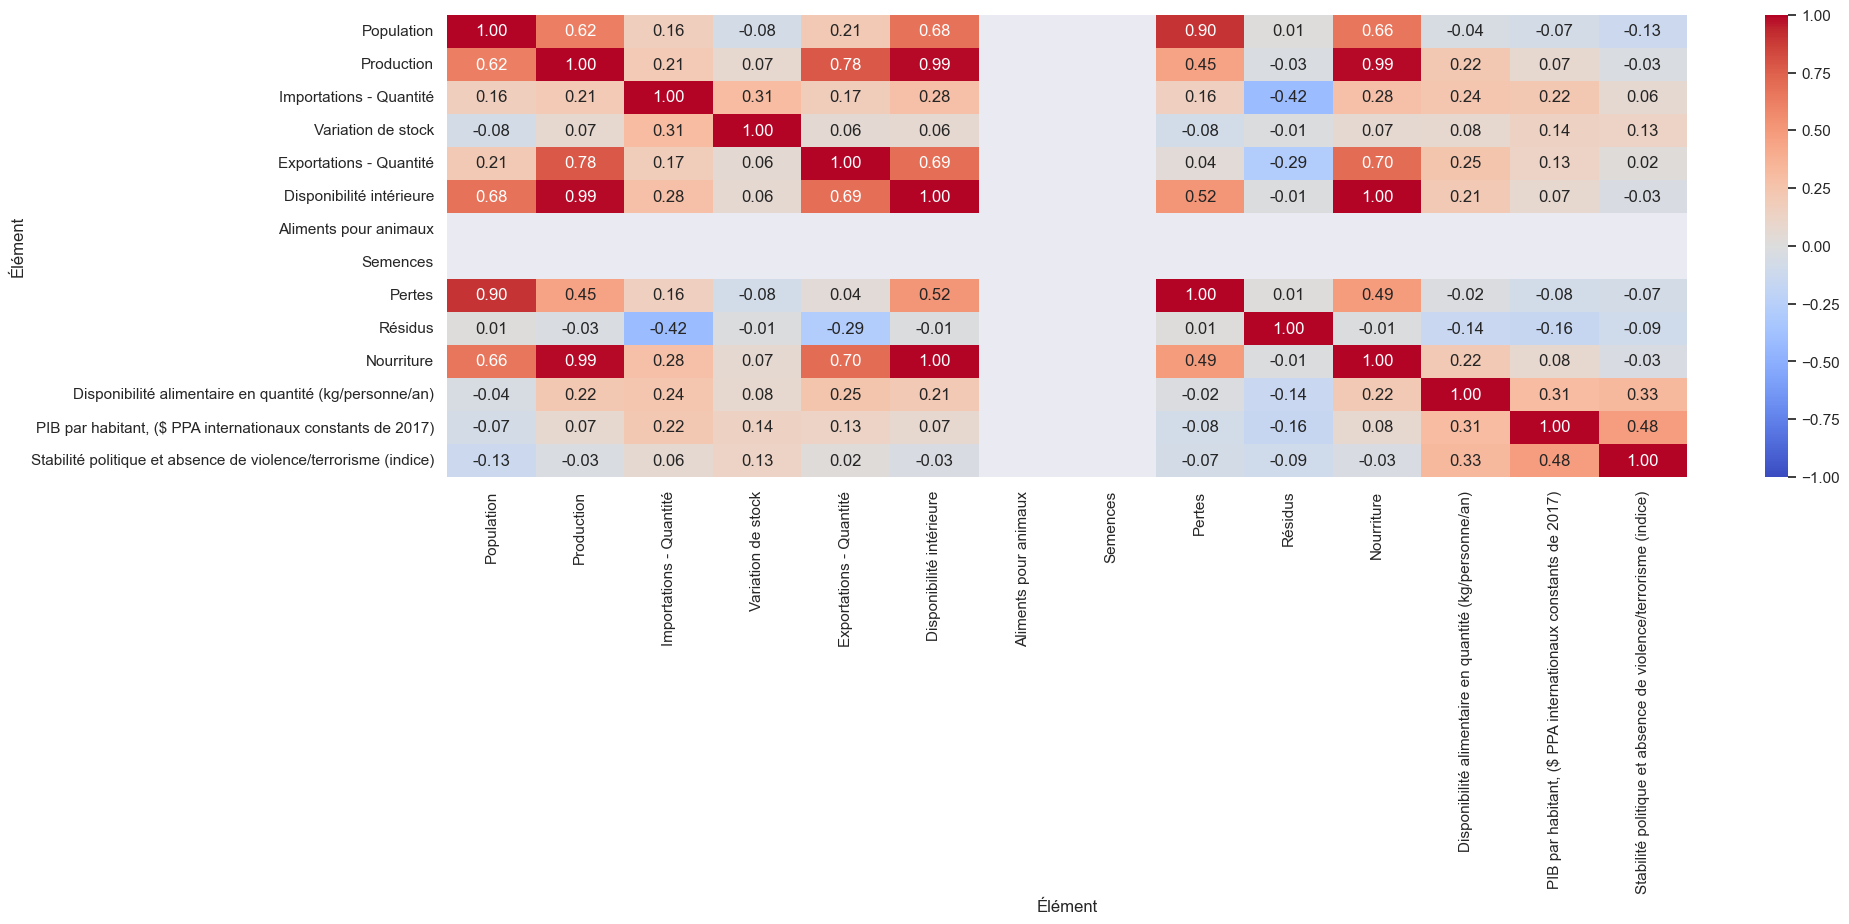

In [30]:
# Correlation matrix calculation
matrice = alim_2017_volailles.corr()

# Create the graph
fig, ax = plt.subplots(figsize=(20, 6))

# Create the heatmap
sns.heatmap(matrice, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

We can find that the variables 'Production'/'Disponilité interne' and 'Nourriture'/'Disponibilité interne' are closely correlated at 0.99 and 1. We decide to delete the variables 'Production' and 'Food'. 

In addition, we lack a lot of data for the 'Aliments pour animaux' and 'Semence' variables. We are deleting these variables as well.

Finally, for more clarity and to avoid distorting the analyses, we will be removing countries whose data is too large to be compared.

In [31]:
# Remove non-essential columns
alim_2017_volailles = alim_2017_volailles.drop(columns={'Production', 'Nourriture', 'Aliments pour animaux', 'Semences'})

In [32]:
# Filter the df to eject USA, India, China and Brasil
alim_2017_volailles = alim_2017_volailles.loc[~alim_2017_volailles.index.isin(['États-Unis d\'Amérique', 'Inde', 'Chine, continentale', 'Brésil'])]

In [33]:
# Export a csv file
alim_2017_volailles_csv_data = alim_2017_volailles.to_csv('alim_2017_volailles.csv', index=True)

#### 2.6 Data Split<a class="anchor" id="section2.6"></a>

Separate our dataframe with X the data matrix

In [34]:
# Convert data into a NumPy table
X = alim_2017_volailles.values
X[:5]

array([[ 3.6296113e+07,  2.9000000e+01,  0.0000000e+00,  0.0000000e+00,
         5.7000000e+01,  2.0000000e+00,  0.0000000e+00,  1.5300000e+00,
         2.0584000e+03, -2.8000000e+00],
       [ 5.7009756e+07,  5.1400000e+02,  0.0000000e+00,  6.3000000e+01,
         2.1180000e+03,  8.3000000e+01,  0.0000000e+00,  3.5690000e+01,
         1.3860300e+04, -2.8000000e-01],
       [ 2.8841690e+06,  3.8000000e+01,  4.0000000e+00,  0.0000000e+00,
         4.7000000e+01,  0.0000000e+00,  0.0000000e+00,  1.6360000e+01,
         1.2771000e+04,  3.8000000e-01],
       [ 4.1389189e+07,  2.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         2.7700000e+02,  1.3000000e+01,  0.0000000e+00,  6.3800000e+00,
         1.1737400e+04, -9.2000000e-01],
       [ 8.2658409e+07,  8.4200000e+02, -2.9000000e+01,  6.4600000e+02,
         1.7390000e+03,  0.0000000e+00, -3.8000000e+01,  1.9470000e+01,
         5.3071500e+04,  5.9000000e-01]])

In [35]:
# Display the type of X
type(X)

numpy.ndarray

In [36]:
# Display the dimensions of X
X.shape

(196, 10)

Register country names in a country variable

In [37]:
# Select country names
pays = alim_2017_volailles.index
pays

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite',
       'Argentine',
       ...
       'Yémen', 'Zambie', 'Zimbabwe', 'Égypte', 'Émirats arabes unis',
       'Équateur', 'Érythrée', 'Éthiopie', 'Îles Marshall', 'Îles Salomon'],
      dtype='object', name='Zone', length=196)

Finally our columns in a features variable

In [38]:
# Select column names
features = alim_2017_volailles.columns
features

Index(['Population', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure', 'Pertes',
       'Résidus', 'Disponibilité alimentaire en quantité (kg/personne/an)',
       'PIB par habitant, ($ PPA internationaux constants de 2017)',
       'Stabilité politique et absence de violence/terrorisme (indice)'],
      dtype='object', name='Élément')

### 3. ACP<a class="anchor" id="chapitre3"></a>

#### 3.1 Scaling<a class="anchor" id="section3.1"></a>

We can start with a data scale

In [39]:
# Init the scaler
scaler = StandardScaler()

We fit and transform our data

In [40]:
# Data standardisation
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[ 0.3884713 , -0.26257417, -0.17736823, -0.28506037, -0.42007119,
        -0.19955526,  0.19047131, -0.97526567, -0.78561704, -2.76464004],
       [ 0.93936629,  2.5237956 , -0.17736823,  0.09140225,  2.6292249 ,
         2.46274667,  0.19047131,  1.15964578, -0.24466063, -0.22013057],
       [-0.5001446 , -0.21086834, -0.11940379, -0.28506037, -0.43486642,
        -0.26529111,  0.19047131, -0.04842911, -0.2945902 ,  0.44628858],
       [ 0.52392551, -0.41769166, -0.17736823, -0.28506037, -0.09457622,
         0.16199192,  0.19047131, -0.67215324, -0.34196669, -0.8663552 ],
       [ 1.6215116 ,  4.40818588, -0.59761041,  3.57517536,  2.06848583,
        -0.26529111, -2.86692164,  0.14593782,  1.55263895,  0.65833104]])

The mean must be 0 and the standard deviation 1.

In [41]:
# Mean and standard deviation calculation
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9
mean,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


#### 3.2 ACP<a class="anchor" id="section3.2"></a>

We take the first six components

In [42]:
# Number of principal components to be extracted
n_components = 6

Instantiate our PCA

In [43]:
# Init the principal components analysis(PCA)
pca = PCA(n_components=n_components)

We train it on our scaled data

In [44]:
# PCA training on standardised data
pca.fit(X_scaled)

PCA(n_components=6)

#### 3.3 Variance and scree diagram<a class="anchor" id="section3.3"></a>

Let's look at the variance for each component

In [45]:
# Ratio variance
explained_variance_ratios = pca.explained_variance_ratio_

Here the 1st component *captures* 41% of the variance of our initial data, the 2nd 20% etc.

Let's create a variable with the values in units

In [46]:
# Inertia percent calculation
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([29.05, 21.  , 14.55,  9.55,  6.95,  6.41])

We can create the variable with the cumulative sums

In [47]:
# Calculation of the cumulative inertia percent
scree_cum = scree.cumsum().round()
scree_cum

array([29., 50., 65., 74., 81., 88.])

Next, we define a variable with the list of our components and display the graph:

In [48]:
# List of axes ranks
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

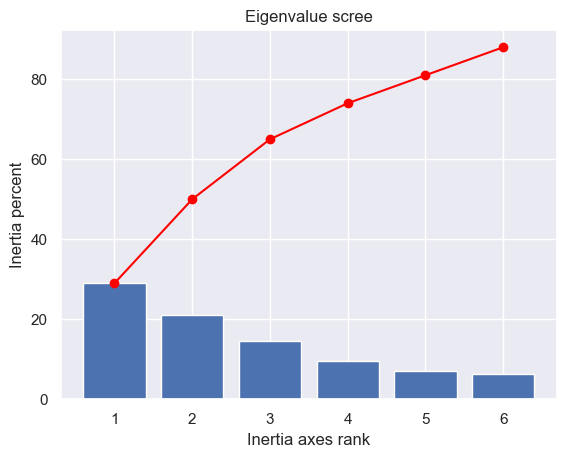

In [49]:
# Eigenvalue scree plot
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Inertia axes rank")
plt.ylabel("Inertia percent")
plt.title("Eigenvalue scree")
plt.show(block=False)

The variance of each new component is shown in blue, while the cumulative variance is shown in red.

#### 3.4 Components<a class="anchor" id="section3.4"></a>

Let's calculate our components using the components_ attribute

In [50]:
# Principal components
pcs = pca.components_
pcs

array([[ 3.25594644e-01,  4.69657212e-01,  2.23802748e-01,
         3.73581933e-01,  4.68099930e-01,  2.79196375e-01,
        -3.18512247e-01,  2.23491471e-01,  1.84579795e-01,
         3.49678496e-02],
       [-4.45410076e-01,  5.56622803e-02, -8.19093355e-03,
         2.27181077e-01, -2.63802260e-01, -3.12945652e-01,
        -2.88476935e-01,  2.84503652e-01,  3.98343996e-01,
         5.06426123e-01],
       [-2.14451948e-03,  2.30769963e-02, -2.69741041e-01,
         4.84069835e-01, -2.00338296e-01, -2.32422347e-01,
        -5.27202416e-01, -3.15582428e-01, -3.08501511e-01,
        -3.54281809e-01],
       [ 2.44940203e-02,  1.65883839e-01,  8.07943920e-01,
        -8.07679183e-04, -1.42842886e-01, -3.15773053e-01,
         3.95091140e-02, -4.43862597e-01, -1.63926128e-03,
         2.03516809e-02],
       [ 2.81187516e-01, -8.45583638e-02, -3.01639001e-01,
         1.13131661e-03,  3.74948611e-02,  2.51873636e-02,
         1.81822119e-02, -5.91676263e-01,  6.79233599e-01,
         9.

Pandas version

In [51]:
# Create a df for principal components
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9
0,0.325595,0.469657,0.223803,0.373582,0.468100,0.279196,-0.318512,0.223491,0.184580,0.034968
1,-0.445410,0.055662,-0.008191,0.227181,-0.263802,-0.312946,-0.288477,0.284504,0.398344,0.506426
2,-0.002145,0.023077,-0.269741,0.484070,-0.200338,-0.232422,-0.527202,-0.315582,-0.308502,-0.354282
3,0.024494,0.165884,0.807944,-0.000808,-0.142843,-0.315773,0.039509,-0.443863,-0.001639,0.020352
4,0.281188,-0.084558,-0.301639,0.001131,0.037495,0.025187,0.018182,-0.591676,0.679234,0.094795
5,-0.256852,-0.218134,0.151192,0.112603,-0.149089,0.744956,-0.192425,-0.303799,-0.179495,0.334932


Now let's rename the index with the names of the components and the columns with our features

In [52]:
# Assigning column and index names
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

Élément,Population,Importations - Quantité,Variation de stock,Exportations - Quantité,Disponibilité intérieure,Pertes,Résidus,Disponibilité alimentaire en quantité (kg/personne/an),"PIB par habitant, ($ PPA internationaux constants de 2017)",Stabilité politique et absence de violence/terrorisme (indice)
F1,0.33,0.47,0.22,0.37,0.47,0.28,-0.32,0.22,0.18,0.03
F2,-0.45,0.06,-0.01,0.23,-0.26,-0.31,-0.29,0.28,0.40,0.51
F3,-0.00,0.02,-0.27,0.48,-0.20,-0.23,-0.53,-0.32,-0.31,-0.35
F4,0.02,0.17,0.81,-0.00,-0.14,-0.32,0.04,-0.44,-0.00,0.02
F5,0.28,-0.08,-0.30,0.00,0.04,0.03,0.02,-0.59,0.68,0.09
F6,-0.26,-0.22,0.15,0.11,-0.15,0.74,-0.19,-0.30,-0.18,0.33


Let's reverse the table

In [53]:
# Df transposition
pcs.T

,F1,F2,F3,F4,F5,F6
Élément,,,,,,
Population,0.325595,-0.445410,-0.002145,0.024494,0.281188,-0.256852
Importations - Quantité,0.469657,0.055662,0.023077,0.165884,-0.084558,-0.218134
Variation de stock,0.223803,-0.008191,-0.269741,0.807944,-0.301639,0.151192
Exportations - Quantité,0.373582,0.227181,0.484070,-0.000808,0.001131,0.112603
Disponibilité intérieure,0.468100,-0.263802,-0.200338,-0.142843,0.037495,-0.149089
Pertes,0.279196,-0.312946,-0.232422,-0.315773,0.025187,0.744956
Résidus,-0.318512,-0.288477,-0.527202,0.039509,0.018182,-0.192425
Disponibilité alimentaire en quantité (kg/personne/an),0.223491,0.284504,-0.315582,-0.443863,-0.591676,-0.303799
"PIB par habitant, ($ PPA internationaux constants de 2017)",0.184580,0.398344,-0.308502,-0.001639,0.679234,-0.179495


A graphic representation of the table

<AxesSubplot:ylabel='Élément'>

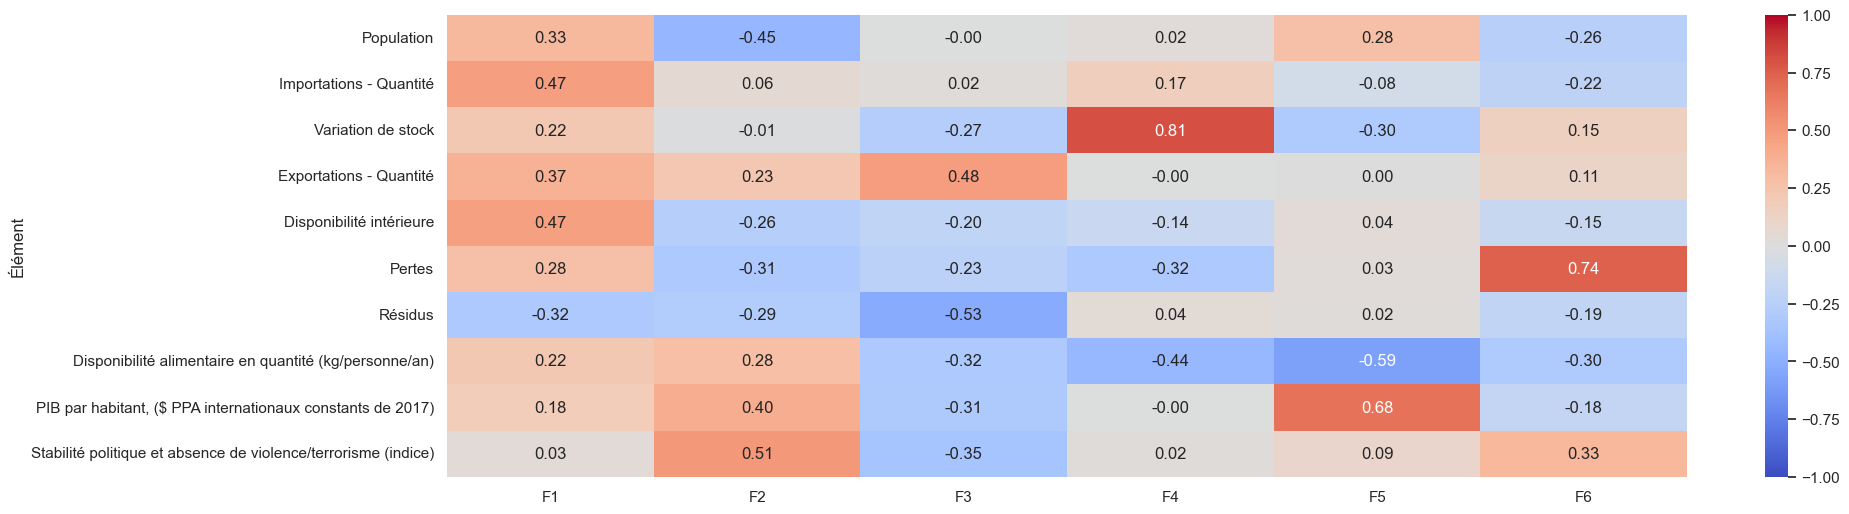

In [54]:
# Create the heatmap for the principal components
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

#### 3.5 Correlation graph<a class="anchor" id="section3.5"></a>

Let's define our x and y axes. With the first two components

In [55]:
x, y = 0,1

For the graphic part

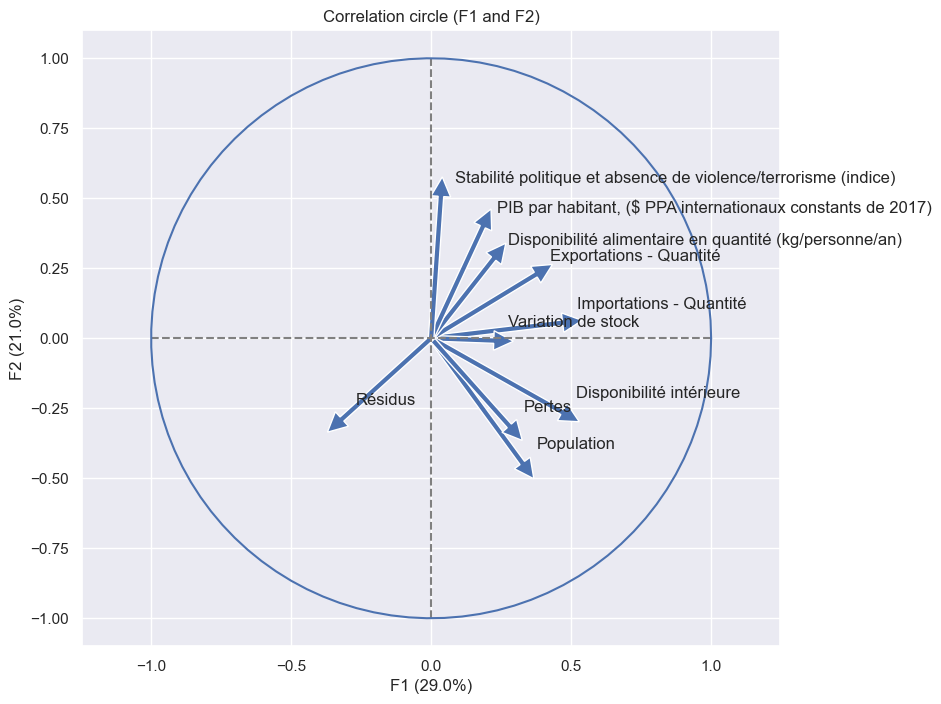

In [56]:
fig, ax = plt.subplots(figsize=(9, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i],
             ha='left',
             va='baseline')
    
# Display horizontal and vertical lines
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# Name the axes, with the inertia percent explained
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Correlation circle (F{} and F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scaling
plt.axis('equal')
plt.show(block=False)

As a function

In [57]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Displays the correlation graph

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : our PCA object which has been fit
    x_y : list or tuple : the x,y pair of planes to display, e.g. [0,1] for F1, F2
    features: list or tuple: the list of features (i.e. dimensions) to represent
    """

    # Extract x and y
    x,y=x_y

    # Image size (inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # For each components : 
    for i in range(0, pca.components_.shape[1]):

        # The arrows
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # The labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Display horizontal and vertical lines
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Name the axes, with the inertia percent explained
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    
    plt.title("Correlations circle (F{} and F{})".format(x+1, y+1))

    # The circle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an)) # Add a unit circle for scaling

    # Axes and display
    plt.axis('equal')
    plt.show(block=False)

With the third and fourth components

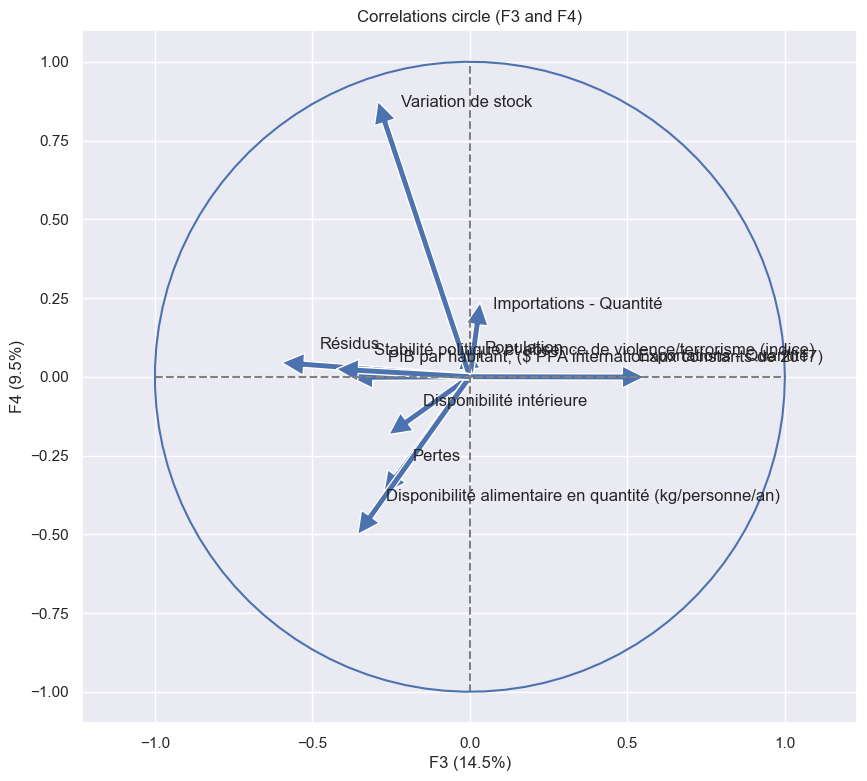

In [58]:
correlation_graph(pca, (2,3), features)

#### 3.6 Projection<a class="anchor" id="section3.6"></a>

Projecting our dimensions. First, let's calculate the coordinates of our individuals in the new space: 

In [59]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-0.91568853, -2.12313133,  1.4626848 ,  0.33133549, -0.05134969,
        -0.71276872],
       [ 3.5495987 , -1.65396874, -1.26373044, -1.36622375, -0.60477361,
         0.21555755],
       [-0.78298638,  0.3849293 , -0.11315865,  0.04100469, -0.23576857,
         0.17192774],
       [-0.47511971, -1.16680604,  0.40452236,  0.05162609,  0.32311196,
        -0.02883684],
       [ 5.94972732,  1.69803076,  2.39051401, -0.09364877,  1.31691903,
        -1.12272729]])

The function

In [60]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[6,4], 
                                marker=".",
                                marker_size=20,
                                legend_title=None):
    """
    Displays the projection of individuals

    Positional arguments : 
    -------------------------------------
    X_projected: np.array, pd.DataFrame, list of list: the matrix of projected points
    x_y : list or tuple : the x,y pair of planes to be displayed, e.g. [0,1] for F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : a PCA object which has been fit, this will allow us to display the variance of each component, default = None
    labels : list or tuple : the labels of the individuals to be projected, default = None
    clusters : list or tuple : the list of clusters to which each individual belongs, default = None
    alpha : float in [0,1] : transparency parameter, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list or tuple : width, height pair which defines the size of the figure in inches, default = [10,8]. 
    marker : str : the type of marker used to represent individuals, crosshairs etc etc, default = ".
    """

    # Transform X_projected to np.array
    X_ = np.array(X_projected)

    # Define the figure size
    if not figsize: 
        figsize = (7,6)

    # Labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # Check the x variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes are asked")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("Axis variable is not good")

    # Define x et y
    x, y = x_y

    # Init the figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # Check if there are clusters
    c = None if clusters is None else clusters
 
    # Points    
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, alpha=alpha, marker=marker, s=marker_size)

    # If the pca variable has been supplied, we can calculate the % variance of each axis 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Name the axes, with the inertia percent explained
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Values x max and y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # Limit of x and y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Display horizontal and vertical lines
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Display of labels and points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='bottom')

    # Title and display
    plt.title(f"Projection of individuals (on F{x+1} and F{y+1})")
    plt.show()


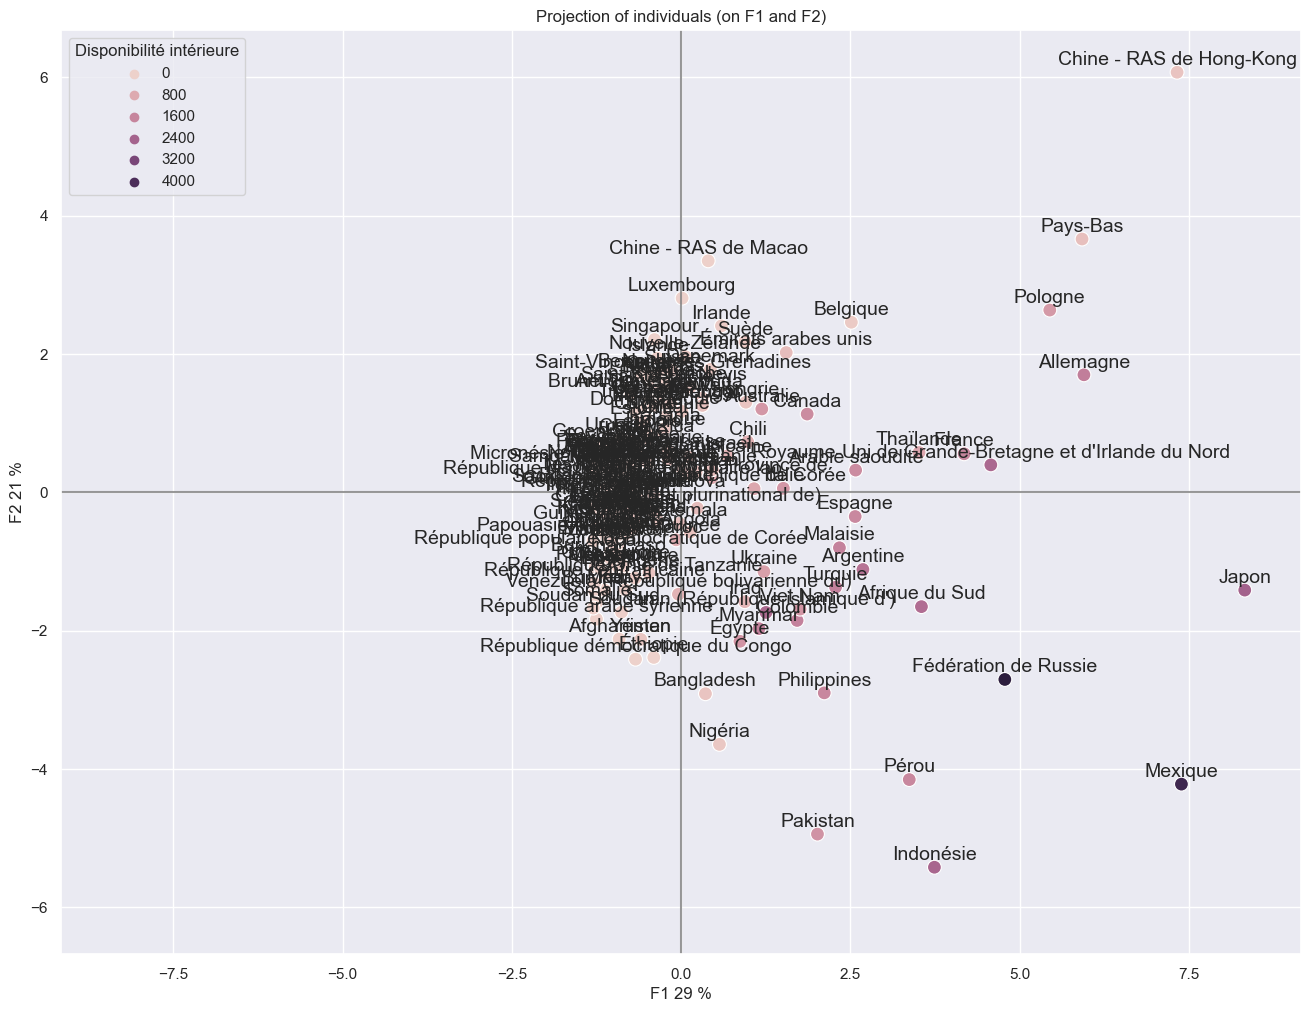

In [61]:
# Display factorial plans
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=pays, figsize=(16,12), clusters=alim_2017_volailles['Disponibilité intérieure'], marker="o", marker_size=100)

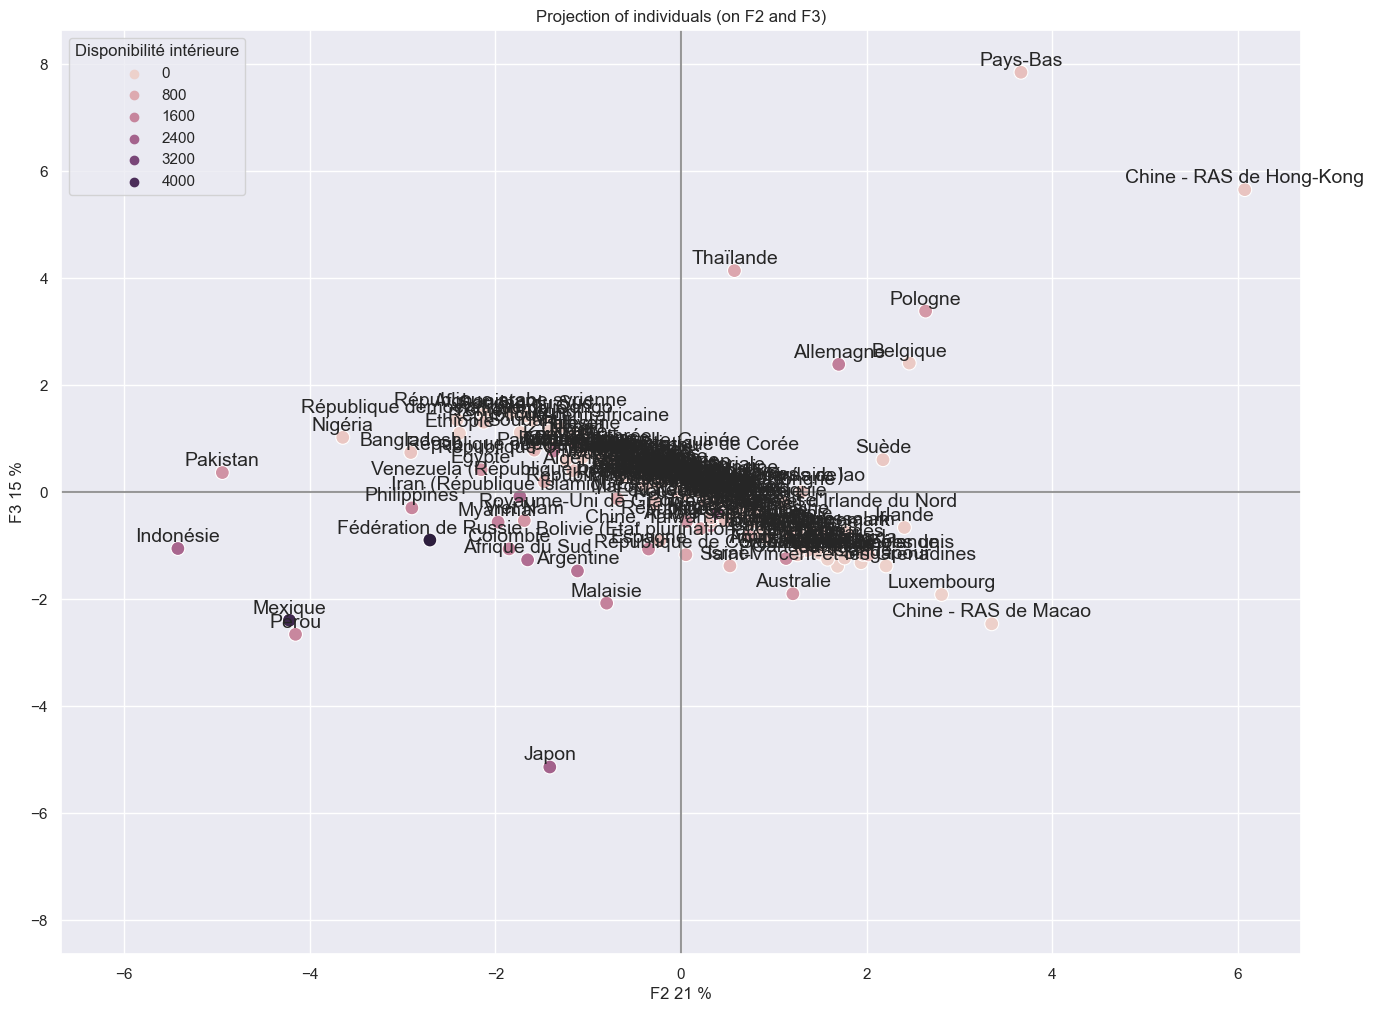

In [62]:
# Display factorial plans with other components
x_y = [1,2]
display_factorial_planes(X_proj, x_y, pca, labels=pays, figsize=(16,12), clusters=alim_2017_volailles['Disponibilité intérieure'], marker="o", marker_size=100)